In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%pip install pypsa[gurobi] "xarray>=2023.8.0" 

Note: you may need to restart the kernel to use updated packages.


In [3]:
from add_country import *

In [4]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [5]:
add_scandinavia(network, climatic_year, time_horizon_in_hours)

In [6]:
add_germany(network, climatic_year, time_horizon_in_hours)
add_iberian(network, climatic_year, time_horizon_in_hours)
add_poland(network, climatic_year, time_horizon_in_hours)
add_france(network, climatic_year, time_horizon_in_hours)

In [7]:
network.generators

attribute                                            bus control type  \
Generator                                                               
scandinaviaGas                               Scandinavia      PQ        
scandinaviaBioEnergies                       Scandinavia      PQ        
scandinaviaHydroelectric                     Scandinavia      PQ        
scandinaviaWind_on_shore                     Scandinavia      PQ        
scandinaviaWind_off_shore                    Scandinavia      PQ        
scandinaviaNuclear                           Scandinavia      PQ        
scandinaviaSolar                             Scandinavia      PQ        
scandinaviaFailure                           Scandinavia      PQ        
GER-Hydro_ROR                                    Germany      PQ        
GER-WindOnshore                                  Germany      PQ        
GER-WindOffshore                                 Germany      PQ        
GER-Solar                                        Germany      PQ        
GER-Coal                                         Germany      PQ        
GER-Biomass                                      Germany      PQ        
GER-CCGT                                         Germany      PQ        
GER-Oil                                          Germany      PQ        
GER-Failure                                      Germany      PQ        
iberian-OCGT                           Iberian_Peninsula      PQ        
iberianBioEnergies                     Iberian_Peninsula      PQ        
iberianHydroelectric                   Iberian_Peninsula      PQ        
iberianWind_on_shore                   Iberian_Peninsula      PQ        
iberianWind_off_shore                  Iberian_Peninsula      PQ        
iberianNuclear                         Iberian_Peninsula      PQ        
iberianSolar                           Iberian_Peninsula      PQ        
iberianFailure                         Iberian_Peninsula      PQ        
poland_Lignite                                    poland      PQ        
poland_Coal                                       poland      PQ        
poland_Gas                                        poland      PQ        
poland_Others non-renewable                       poland      PQ        
poland_Hydro - Run of River (Turbine)             poland      PQ        
poland_Wind Onshore                               poland      PQ        
poland_Wind Offshore                              poland      PQ        
poland_Solar (Photovoltaic)                       poland      PQ        
poland_Biofuel                                    poland      PQ        
poland_Others renewable                           poland      PQ        
polandFailure                                     poland      PQ        
FranceNuclear                                     France      PQ        
FranceWindOnshore                                 France      PQ        
FranceWindOffshore                                France      PQ        
FranceSolar                                       France      PQ        
FranceOCGT                                        France      PQ        
FranceBioEnergies                                 France      PQ        
FranceHydro                                       France      PQ        
FranceFailure                                     France      PQ        

attribute                                  p_nom  p_nom_extendable  p_nom_min  \
Generator                                                                       
scandinaviaGas                            5000.0             False        0.0   
scandinaviaBioEnergies                   11000.0             False        0.0   
scandinaviaHydroelectric                 57000.0             False        0.0   
scandinaviaWind_on_shore                 43000.0             False        0.0   
scandinaviaWind_off_shore                17000.0             False        0.0   
scandinaviaNuclear                       11000.0             False        

In [8]:
network

PyPSA Network
Components:
 - Bus: 5
 - Carrier: 19
 - Generator: 44
 - Load: 9
 - StorageUnit: 6
 - Store: 11
Snapshots: 8760

In [9]:
links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"poland", "bus1":"Scandinavia", "p_nom":600, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":7415, "efficiency":0.95}, #2000 at first
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian_Peninsula", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian_Peninsula", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

(<matplotlib.collections.PatchCollection at 0x7f9b2794b6a0>,
 <matplotlib.collections.LineCollection at 0x7f9b2844c250>)

/Users/alexandrerebiere/Documents/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



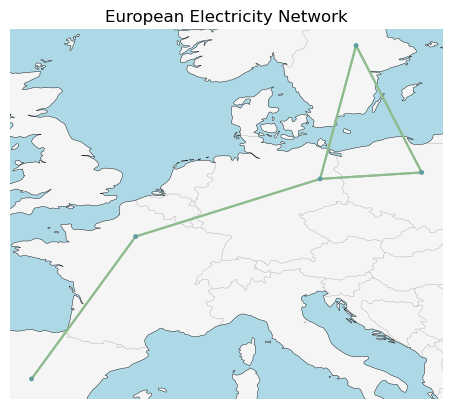

In [10]:
network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)

In [11]:
result = network.optimize(solver_name="gurobi")
print(result)   

Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy.gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2024-11-21


INFO:gurobipy.gurobipy:Academic license - for non-commercial use only - expires 2024-11-21
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|█████████████████████████████████████████| 3/3 [00:00<00:00, 19.21it/s]
INFO:linopy.io: Writing time: 13.0s


Read LP format model from file /private/var/folders/ms/4_rjwj4n1h1gg3k7zdvmsv5m0000gn/T/linopy-problem-d9xeguv0.lp


INFO:gurobipy.gurobipy:Read LP format model from file /private/var/folders/ms/4_rjwj4n1h1gg3k7zdvmsv5m0000gn/T/linopy-problem-d9xeguv0.lp


Reading time = 4.14 seconds


INFO:gurobipy.gurobipy:Reading time = 4.14 seconds


obj: 1979765 rows, 1068720 columns, 4037398 nonzeros


INFO:gurobipy.gurobipy:obj: 1979765 rows, 1068720 columns, 4037398 nonzeros


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:


CPU model: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz


INFO:gurobipy.gurobipy:CPU model: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:


Optimize a model with 1979765 rows, 1068720 columns and 4037398 nonzeros


INFO:gurobipy.gurobipy:Optimize a model with 1979765 rows, 1068720 columns and 4037398 nonzeros


Model fingerprint: 0x3ea40f3a


INFO:gurobipy.gurobipy:Model fingerprint: 0x3ea40f3a


Variable types: 832200 continuous, 236520 integer (236520 binary)


INFO:gurobipy.gurobipy:Variable types: 832200 continuous, 236520 integer (236520 binary)


Coefficient statistics:


INFO:gurobipy.gurobipy:Coefficient statistics:


  Matrix range     [9e-01, 1e+05]


INFO:gurobipy.gurobipy:  Matrix range     [9e-01, 1e+05]


  Objective range  [1e+00, 1e+05]


INFO:gurobipy.gurobipy:  Objective range  [1e+00, 1e+05]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy.gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [1e+00, 1e+06]


INFO:gurobipy.gurobipy:  RHS range        [1e+00, 1e+06]


Presolve removed 1846687 rows and 706315 columns (presolve time = 5s) ...


INFO:gurobipy.gurobipy:Presolve removed 1846687 rows and 706315 columns (presolve time = 5s) ...


Presolve removed 1848607 rows and 732264 columns (presolve time = 13s) ...


INFO:gurobipy.gurobipy:Presolve removed 1848607 rows and 732264 columns (presolve time = 13s) ...


Presolve removed 1853655 rows and 732264 columns


INFO:gurobipy.gurobipy:Presolve removed 1853655 rows and 732264 columns


Presolve time: 12.76s


INFO:gurobipy.gurobipy:Presolve time: 12.76s


Presolved: 126110 rows, 336456 columns, 1060754 nonzeros


INFO:gurobipy.gurobipy:Presolved: 126110 rows, 336456 columns, 1060754 nonzeros


Variable types: 292406 continuous, 44050 integer (43829 binary)


INFO:gurobipy.gurobipy:Variable types: 292406 continuous, 44050 integer (43829 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy.gurobipy:Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy.gurobipy:Showing barrier log only...


INFO:gurobipy.gurobipy:


Root barrier log...


INFO:gurobipy.gurobipy:Root barrier log...


INFO:gurobipy.gurobipy:


Ordering time: 0.17s


INFO:gurobipy.gurobipy:Ordering time: 0.17s


INFO:gurobipy.gurobipy:


Barrier statistics:


INFO:gurobipy.gurobipy:Barrier statistics:


 AA' NZ     : 1.342e+06


INFO:gurobipy.gurobipy: AA' NZ     : 1.342e+06


 Factor NZ  : 4.736e+06 (roughly 200 MB of memory)


INFO:gurobipy.gurobipy: Factor NZ  : 4.736e+06 (roughly 200 MB of memory)


 Factor Ops : 3.249e+08 (less than 1 second per iteration)


INFO:gurobipy.gurobipy: Factor Ops : 3.249e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy.gurobipy: Threads    : 1


INFO:gurobipy.gurobipy:


                  Objective                Residual


INFO:gurobipy.gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy.gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0  -3.35502360e+13 -3.37657904e+16  1.88e+05 1.06e+07  2.60e+11    16s


INFO:gurobipy.gurobipy:   0  -3.35502360e+13 -3.37657904e+16  1.88e+05 1.06e+07  2.60e+11    16s


   1  -1.40709155e+13 -1.52546044e+16  7.12e+04 8.27e+06  9.99e+10    16s


INFO:gurobipy.gurobipy:   1  -1.40709155e+13 -1.52546044e+16  7.12e+04 8.27e+06  9.99e+10    16s


   2  -2.93881426e+12 -5.52873006e+15  1.55e+04 5.49e+05  2.32e+10    17s


INFO:gurobipy.gurobipy:   2  -2.93881426e+12 -5.52873006e+15  1.55e+04 5.49e+05  2.32e+10    17s


   3   1.56535951e+09 -1.40632404e+15  1.11e+03 1.13e+04  2.74e+09    17s


INFO:gurobipy.gurobipy:   3   1.56535951e+09 -1.40632404e+15  1.11e+03 1.13e+04  2.74e+09    17s


   4   1.58777346e+11 -4.79313850e+14  3.96e+02 3.73e-08  8.38e+08    17s


INFO:gurobipy.gurobipy:   4   1.58777346e+11 -4.79313850e+14  3.96e+02 3.73e-08  8.38e+08    17s


   5   2.36348643e+11 -7.03063178e+13  9.13e+01 4.10e-08  1.16e+08    18s


INFO:gurobipy.gurobipy:   5   2.36348643e+11 -7.03063178e+13  9.13e+01 4.10e-08  1.16e+08    18s


   6   2.44239214e+11 -8.04629316e+12  2.02e+01 4.10e-08  1.36e+07    18s


INFO:gurobipy.gurobipy:   6   2.44239214e+11 -8.04629316e+12  2.02e+01 4.10e-08  1.36e+07    18s


   7   1.75231355e+11 -3.02354208e+12  6.98e+00 3.35e-08  5.03e+06    18s


INFO:gurobipy.gurobipy:   7   1.75231355e+11 -3.02354208e+12  6.98e+00 3.35e-08  5.03e+06    18s


   8   1.22037012e+11 -1.14211647e+12  3.35e+00 3.17e-08  1.99e+06    18s


INFO:gurobipy.gurobipy:   8   1.22037012e+11 -1.14211647e+12  3.35e+00 3.17e-08  1.99e+06    18s


   9   9.32709591e+10 -3.35896329e+11  1.50e+00 3.07e-08  6.78e+05    18s


INFO:gurobipy.gurobipy:   9   9.32709591e+10 -3.35896329e+11  1.50e+00 3.07e-08  6.78e+05    18s


  10   7.36443491e+10 -9.46490437e+10  4.52e-01 2.14e-08  2.52e+05    19s


INFO:gurobipy.gurobipy:  10   7.36443491e+10 -9.46490437e+10  4.52e-01 2.14e-08  2.52e+05    19s


  11   6.41831282e+10 -6.34253864e+09  1.69e-01 1.64e-08  1.03e+05    19s


INFO:gurobipy.gurobipy:  11   6.41831282e+10 -6.34253864e+09  1.69e-01 1.64e-08  1.03e+05    19s


  12   5.97938487e+10  2.30094667e+10  9.72e-02 1.29e-08  5.31e+04    19s


INFO:gurobipy.gurobipy:  12   5.97938487e+10  2.30094667e+10  9.72e-02 1.29e-08  5.31e+04    19s


  13   5.64670400e+10  4.13367343e+10  4.82e-02 2.49e-08  2.17e+04    19s


INFO:gurobipy.gurobipy:  13   5.64670400e+10  4.13367343e+10  4.82e-02 2.49e-08  2.17e+04    19s


  14   5.45686746e+10  4.66388877e+10  2.66e-02 3.25e-09  1.14e+04    20s


INFO:gurobipy.gurobipy:  14   5.45686746e+10  4.66388877e+10  2.66e-02 3.25e-09  1.14e+04    20s


  15   5.38432408e+10  4.86367293e+10  1.88e-02 3.33e-09  7.45e+03    20s


INFO:gurobipy.gurobipy:  15   5.38432408e+10  4.86367293e+10  1.88e-02 3.33e-09  7.45e+03    20s


  16   5.35418769e+10  4.98816870e+10  1.58e-02 2.50e-09  5.24e+03    20s


INFO:gurobipy.gurobipy:  16   5.35418769e+10  4.98816870e+10  1.58e-02 2.50e-09  5.24e+03    20s


  17   5.28780185e+10  5.04467789e+10  8.91e-03 3.13e-09  3.47e+03    21s


INFO:gurobipy.gurobipy:  17   5.28780185e+10  5.04467789e+10  8.91e-03 3.13e-09  3.47e+03    21s


  18   5.26593023e+10  5.07613268e+10  6.66e-03 2.67e-09  2.71e+03    21s


INFO:gurobipy.gurobipy:  18   5.26593023e+10  5.07613268e+10  6.66e-03 2.67e-09  2.71e+03    21s


  19   5.25285331e+10  5.09859820e+10  5.34e-03 2.41e-09  2.20e+03    22s


INFO:gurobipy.gurobipy:  19   5.25285331e+10  5.09859820e+10  5.34e-03 2.41e-09  2.20e+03    22s


  20   5.23648834e+10  5.13500345e+10  3.69e-03 2.91e-09  1.45e+03    22s


INFO:gurobipy.gurobipy:  20   5.23648834e+10  5.13500345e+10  3.69e-03 2.91e-09  1.45e+03    22s


  21   5.22203844e+10  5.15807157e+10  2.32e-03 2.91e-09  9.12e+02    23s


INFO:gurobipy.gurobipy:  21   5.22203844e+10  5.15807157e+10  2.32e-03 2.91e-09  9.12e+02    23s


  22   5.21136908e+10  5.17308323e+10  1.30e-03 2.98e-09  5.45e+02    23s


INFO:gurobipy.gurobipy:  22   5.21136908e+10  5.17308323e+10  1.30e-03 2.98e-09  5.45e+02    23s


  23   5.20739919e+10  5.18223989e+10  9.33e-04 4.59e-09  3.59e+02    24s


INFO:gurobipy.gurobipy:  23   5.20739919e+10  5.18223989e+10  9.33e-04 4.59e-09  3.59e+02    24s


  24   5.20443251e+10  5.18666840e+10  6.72e-04 3.05e-09  2.53e+02    24s


INFO:gurobipy.gurobipy:  24   5.20443251e+10  5.18666840e+10  6.72e-04 3.05e-09  2.53e+02    24s


  25   5.20183098e+10  5.18941668e+10  4.51e-04 3.63e-09  1.77e+02    24s


INFO:gurobipy.gurobipy:  25   5.20183098e+10  5.18941668e+10  4.51e-04 3.63e-09  1.77e+02    24s


INFO:gurobipy.gurobipy:


Barrier performed 25 iterations in 24.21 seconds (15.44 work units)


INFO:gurobipy.gurobipy:Barrier performed 25 iterations in 24.21 seconds (15.44 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy.gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy.gurobipy:


Concurrent spin time: 0.11s


INFO:gurobipy.gurobipy:Concurrent spin time: 0.11s


INFO:gurobipy.gurobipy:


Solved with dual simplex


INFO:gurobipy.gurobipy:Solved with dual simplex


INFO:gurobipy.gurobipy:


Root simplex log...


INFO:gurobipy.gurobipy:Root simplex log...


INFO:gurobipy.gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy.gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  117961    5.1960939e+10   0.000000e+00   0.000000e+00     25s


INFO:gurobipy.gurobipy:  117961    5.1960939e+10   0.000000e+00   0.000000e+00     25s


INFO:gurobipy.gurobipy:


Root relaxation: objective 5.196094e+10, 117961 iterations, 10.20 seconds (4.67 work units)


INFO:gurobipy.gurobipy:Root relaxation: objective 5.196094e+10, 117961 iterations, 10.20 seconds (4.67 work units)


Total elapsed time = 25.41s


INFO:gurobipy.gurobipy:Total elapsed time = 25.41s


INFO:gurobipy.gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy.gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy.gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy.gurobipy:


     0     0 5.1961e+10    0 7199          - 5.1961e+10      -     -   29s


INFO:gurobipy.gurobipy:     0     0 5.1961e+10    0 7199          - 5.1961e+10      -     -   29s


H    0     0                    5.309262e+10 5.1961e+10  2.13%     -   30s


INFO:gurobipy.gurobipy:H    0     0                    5.309262e+10 5.1961e+10  2.13%     -   30s


H    0     0                    5.309138e+10 5.1961e+10  2.13%     -   32s


INFO:gurobipy.gurobipy:H    0     0                    5.309138e+10 5.1961e+10  2.13%     -   32s


     0     0 5.2684e+10    0 2979 5.3091e+10 5.2684e+10  0.77%     -   39s


INFO:gurobipy.gurobipy:     0     0 5.2684e+10    0 2979 5.3091e+10 5.2684e+10  0.77%     -   39s


     0     0 5.2722e+10    0 2121 5.3091e+10 5.2722e+10  0.70%     -   43s


INFO:gurobipy.gurobipy:     0     0 5.2722e+10    0 2121 5.3091e+10 5.2722e+10  0.70%     -   43s


     0     0 5.2724e+10    0 2050 5.3091e+10 5.2724e+10  0.69%     -   44s


INFO:gurobipy.gurobipy:     0     0 5.2724e+10    0 2050 5.3091e+10 5.2724e+10  0.69%     -   44s


     0     0 5.2724e+10    0 2050 5.3091e+10 5.2724e+10  0.69%     -   44s


INFO:gurobipy.gurobipy:     0     0 5.2724e+10    0 2050 5.3091e+10 5.2724e+10  0.69%     -   44s


     0     0 5.2783e+10    0 1239 5.3091e+10 5.2783e+10  0.58%     -   46s


INFO:gurobipy.gurobipy:     0     0 5.2783e+10    0 1239 5.3091e+10 5.2783e+10  0.58%     -   46s


H    0     0                    5.284714e+10 5.2783e+10  0.12%     -   47s


INFO:gurobipy.gurobipy:H    0     0                    5.284714e+10 5.2783e+10  0.12%     -   47s


H    0     0                    5.284435e+10 5.2783e+10  0.12%     -   47s


INFO:gurobipy.gurobipy:H    0     0                    5.284435e+10 5.2783e+10  0.12%     -   47s


     0     0 5.2798e+10    0  996 5.2844e+10 5.2798e+10  0.09%     -   48s


INFO:gurobipy.gurobipy:     0     0 5.2798e+10    0  996 5.2844e+10 5.2798e+10  0.09%     -   48s


     0     0 5.2798e+10    0  996 5.2844e+10 5.2798e+10  0.09%     -   48s


INFO:gurobipy.gurobipy:     0     0 5.2798e+10    0  996 5.2844e+10 5.2798e+10  0.09%     -   48s


     0     0 5.2799e+10    0  990 5.2844e+10 5.2799e+10  0.09%     -   49s


INFO:gurobipy.gurobipy:     0     0 5.2799e+10    0  990 5.2844e+10 5.2799e+10  0.09%     -   49s


     0     0 5.2799e+10    0  990 5.2844e+10 5.2799e+10  0.09%     -   49s


INFO:gurobipy.gurobipy:     0     0 5.2799e+10    0  990 5.2844e+10 5.2799e+10  0.09%     -   49s


     0     0 5.2801e+10    0  618 5.2844e+10 5.2801e+10  0.08%     -   51s


INFO:gurobipy.gurobipy:     0     0 5.2801e+10    0  618 5.2844e+10 5.2801e+10  0.08%     -   51s


H    0     0                    5.281295e+10 5.2801e+10  0.02%     -   52s


INFO:gurobipy.gurobipy:H    0     0                    5.281295e+10 5.2801e+10  0.02%     -   52s


     0     0 5.2802e+10    0  584 5.2813e+10 5.2802e+10  0.02%     -   53s


INFO:gurobipy.gurobipy:     0     0 5.2802e+10    0  584 5.2813e+10 5.2802e+10  0.02%     -   53s


     0     0 5.2802e+10    0  543 5.2813e+10 5.2802e+10  0.02%     -   54s


INFO:gurobipy.gurobipy:     0     0 5.2802e+10    0  543 5.2813e+10 5.2802e+10  0.02%     -   54s


     0     0 5.2804e+10    0  437 5.2813e+10 5.2804e+10  0.02%     -   55s


INFO:gurobipy.gurobipy:     0     0 5.2804e+10    0  437 5.2813e+10 5.2804e+10  0.02%     -   55s


     0     0 5.2804e+10    0  437 5.2813e+10 5.2804e+10  0.02%     -   56s


INFO:gurobipy.gurobipy:     0     0 5.2804e+10    0  437 5.2813e+10 5.2804e+10  0.02%     -   56s


     0     0 5.2804e+10    0  437 5.2813e+10 5.2804e+10  0.02%     -   56s


INFO:gurobipy.gurobipy:     0     0 5.2804e+10    0  437 5.2813e+10 5.2804e+10  0.02%     -   56s


H    0     0                    5.281112e+10 5.2804e+10  0.01%     -   57s


INFO:gurobipy.gurobipy:H    0     0                    5.281112e+10 5.2804e+10  0.01%     -   57s


H    0     0                    5.281107e+10 5.2804e+10  0.01%     -   58s


INFO:gurobipy.gurobipy:H    0     0                    5.281107e+10 5.2804e+10  0.01%     -   58s


     0     0 5.2804e+10    0  423 5.2811e+10 5.2804e+10  0.01%     -   58s


INFO:gurobipy.gurobipy:     0     0 5.2804e+10    0  423 5.2811e+10 5.2804e+10  0.01%     -   58s


     0     0 5.2804e+10    0  423 5.2811e+10 5.2804e+10  0.01%     -   58s


INFO:gurobipy.gurobipy:     0     0 5.2804e+10    0  423 5.2811e+10 5.2804e+10  0.01%     -   58s


     0     0 5.2805e+10    0  352 5.2811e+10 5.2805e+10  0.01%     -   60s


INFO:gurobipy.gurobipy:     0     0 5.2805e+10    0  352 5.2811e+10 5.2805e+10  0.01%     -   60s


     0     0 5.2805e+10    0  352 5.2811e+10 5.2805e+10  0.01%     -   60s


INFO:gurobipy.gurobipy:     0     0 5.2805e+10    0  352 5.2811e+10 5.2805e+10  0.01%     -   60s


     0     0 5.2805e+10    0  352 5.2811e+10 5.2805e+10  0.01%     -   60s


INFO:gurobipy.gurobipy:     0     0 5.2805e+10    0  352 5.2811e+10 5.2805e+10  0.01%     -   60s


H    0     0                    5.280943e+10 5.2805e+10  0.01%     -   62s


INFO:gurobipy.gurobipy:H    0     0                    5.280943e+10 5.2805e+10  0.01%     -   62s


INFO:gurobipy.gurobipy:


Cutting planes:


INFO:gurobipy.gurobipy:Cutting planes:


  Gomory: 15


INFO:gurobipy.gurobipy:  Gomory: 15


  Implied bound: 228


INFO:gurobipy.gurobipy:  Implied bound: 228


  MIR: 3885


INFO:gurobipy.gurobipy:  MIR: 3885


  Flow cover: 4343


INFO:gurobipy.gurobipy:  Flow cover: 4343


  RLT: 131


INFO:gurobipy.gurobipy:  RLT: 131


  Relax-and-lift: 1684


INFO:gurobipy.gurobipy:  Relax-and-lift: 1684


INFO:gurobipy.gurobipy:


Explored 1 nodes (144145 simplex iterations) in 62.31 seconds (44.27 work units)


INFO:gurobipy.gurobipy:Explored 1 nodes (144145 simplex iterations) in 62.31 seconds (44.27 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy.gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy.gurobipy:


Solution count 8: 5.28094e+10 5.28111e+10 5.28111e+10 ... 5.30926e+10


INFO:gurobipy.gurobipy:Solution count 8: 5.28094e+10 5.28111e+10 5.28111e+10 ... 5.30926e+10


INFO:gurobipy.gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy.gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 5.280943418022e+10, best bound 5.280511856914e+10, gap 0.0082%


INFO:gurobipy.gurobipy:Best objective 5.280943418022e+10, best bound 5.280511856914e+10, gap 0.0082%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1068720 primals, 0 duals
Objective: 5.28e+10
Solver model: available
Solver message: 2



('ok', 'optimal')


<Axes: xlabel='Generator', ylabel='GW'>

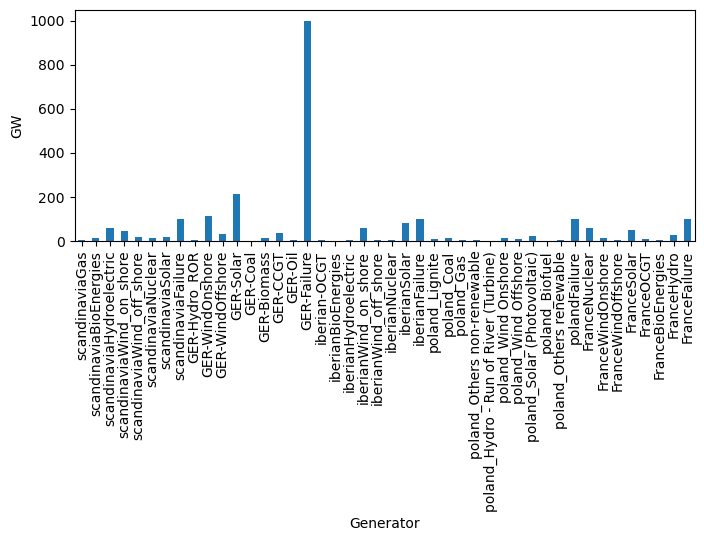

In [12]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

<Axes: xlabel='snapshot', ylabel='GW'>

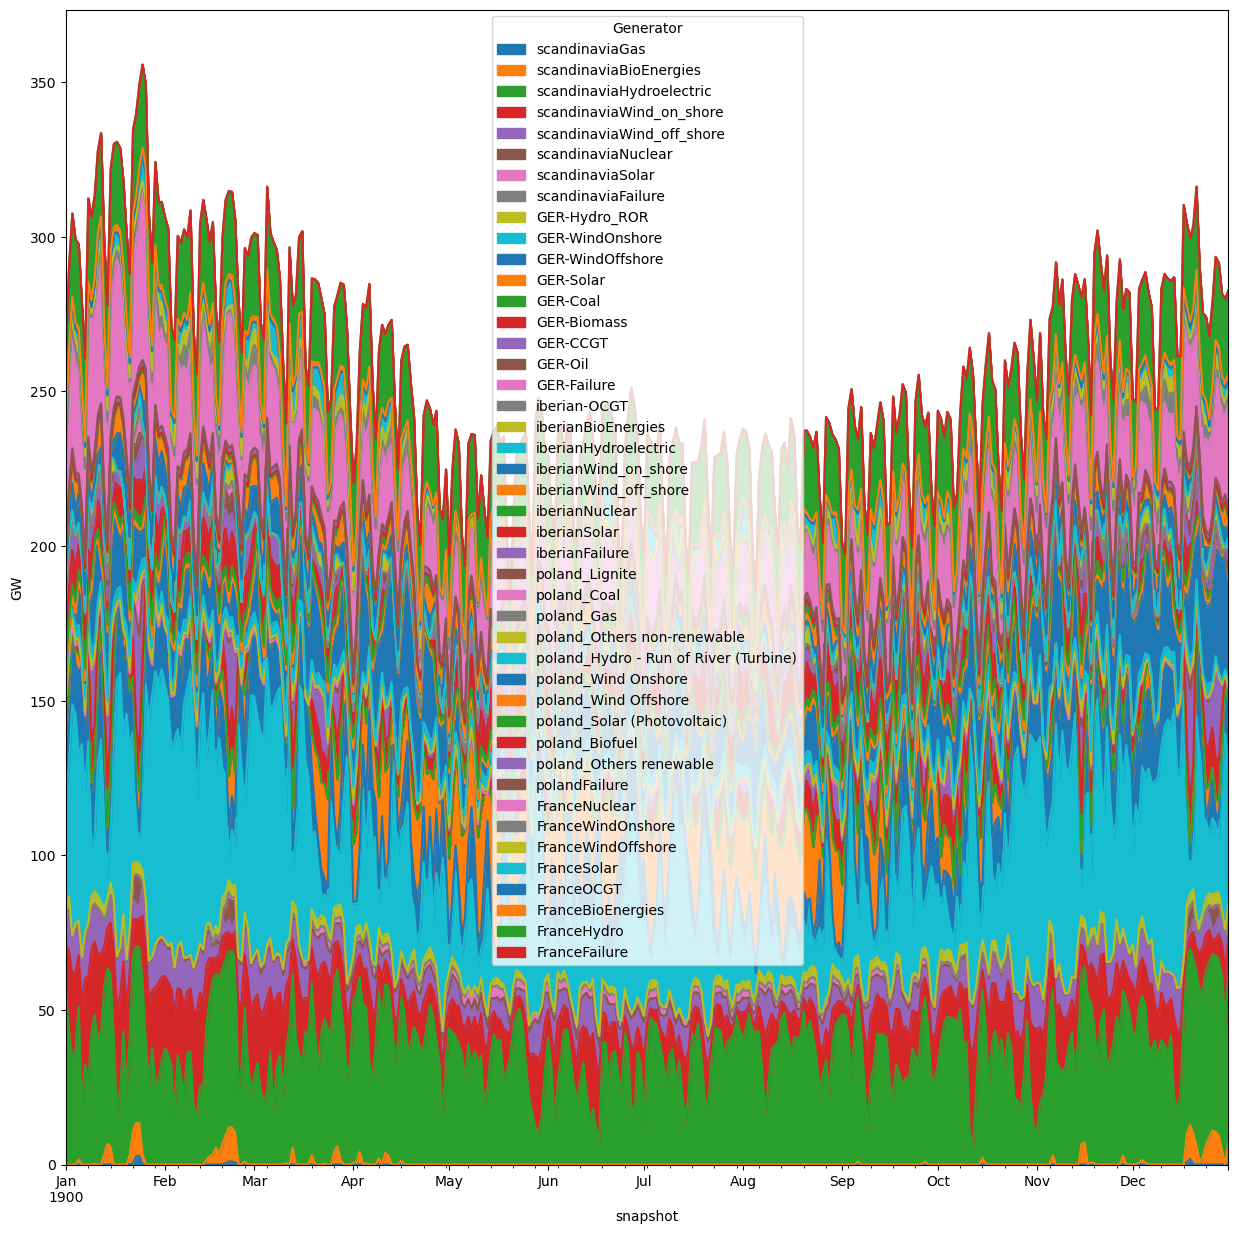

In [18]:
network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
network.generators_t.p['GER-Failure'] = network.generators_t.p['GER-Failure'].clip(lower=0)
network.generators_t.p['GER-CCGT'] = network.generators_t.p['GER-CCGT'].clip(lower=0)
network.generators_t.p['iberianFailure'] = network.generators_t.p['iberianFailure'].clip(lower=0)
network.generators_t.p['polandFailure'] = network.generators_t.p['polandFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceFailure'] = network.generators_t.p['FranceFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['GER-Oil'] = network.generators_t.p['GER-Oil'].clip(lower=0)
network.generators_t.p['iberian-OCGT'] = network.generators_t.p['iberian-OCGT'].clip(lower=0)
network.generators_t.p['iberianSolar'] = network.generators_t.p['iberianSolar'].clip(lower=0)
network.generators_t.p['FranceSolar'] = network.generators_t.p['FranceSolar'].clip(lower=0)
network.generators_t.p['FranceBioEnergies'] = network.generators_t.p['FranceBioEnergies'].clip(lower=0)
network.generators_t.p['iberianSolar'] = network.generators_t.p['iberianSolar'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(15,15), subplots=False, ylabel="GW")

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes:

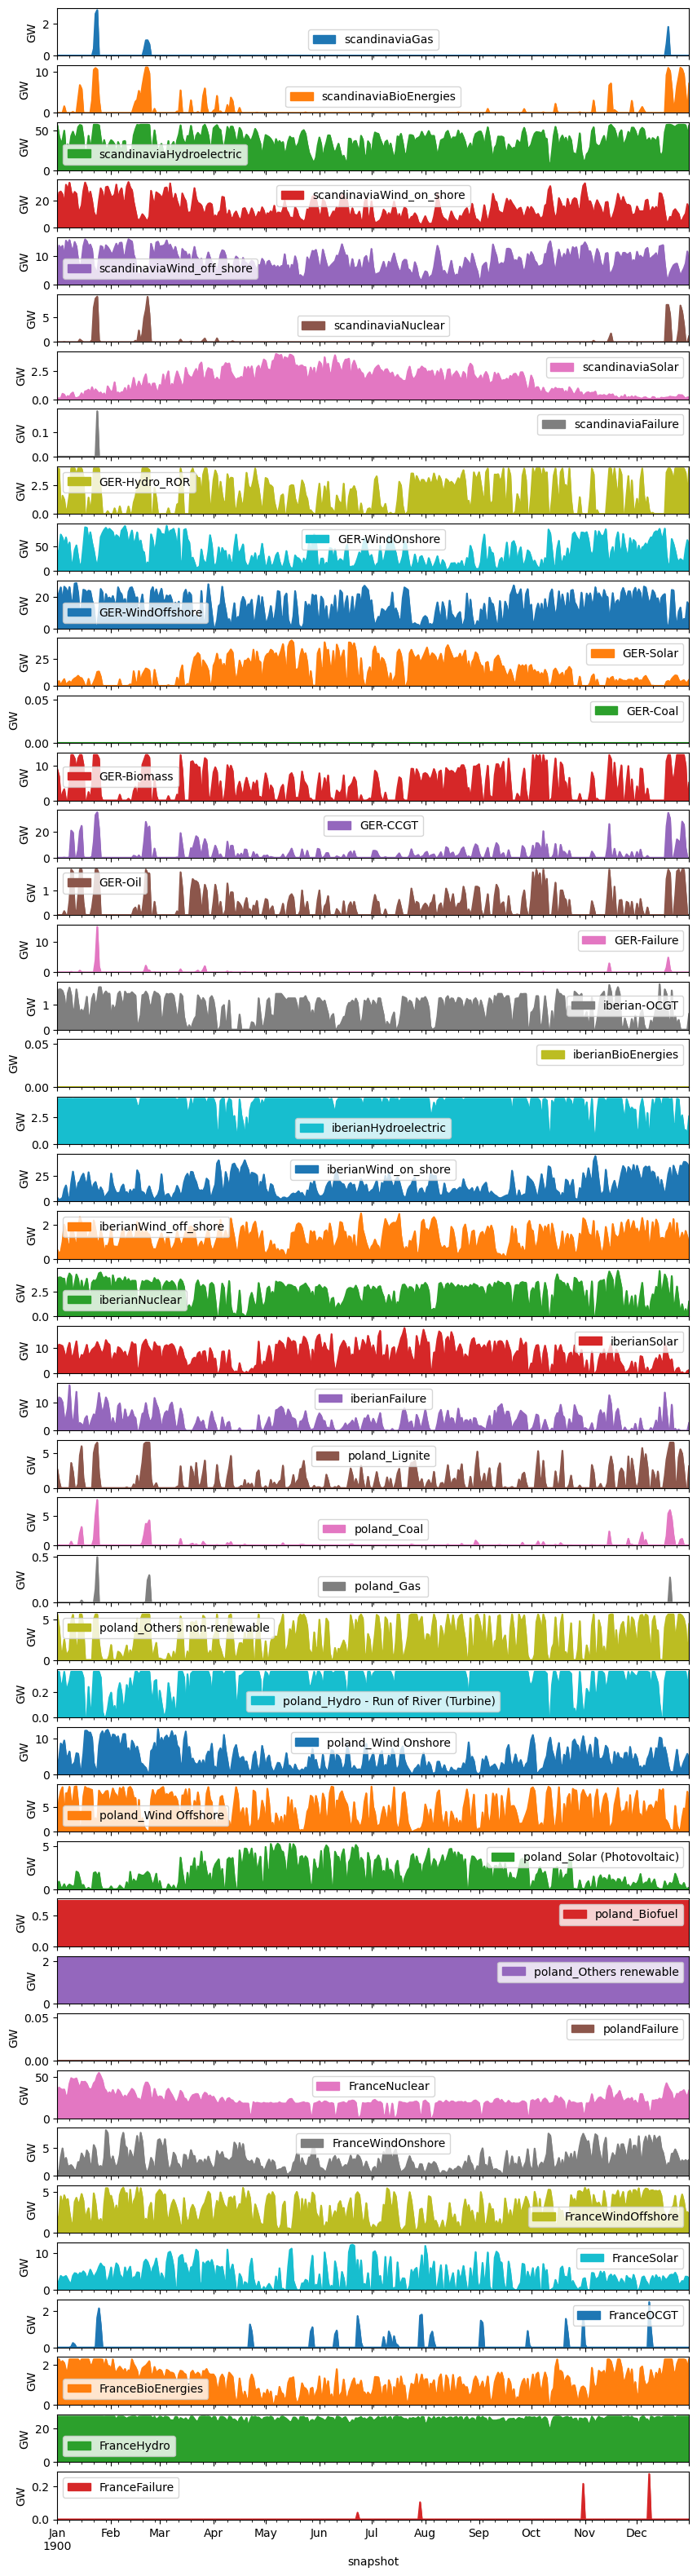

In [19]:
network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(10,40), subplots=True, ylabel="GW")

In [20]:
network.generators.carrier.unique()

array(['Gas', 'BioEnergies', 'Hydro', 'Wind_on_shore', 'Wind_off_shore',
       'Nuclear', 'Solar', 'Failure', 'Wind', 'Coal', 'Biomass', 'Oil',
       'Lignite', 'Others_non_renewable', 'Biofuel', 'Others_renewable',
       'H2'], dtype=object)

<Axes: title={'center': 'European Solar Production'}, xlabel='snapshot', ylabel='GW'>

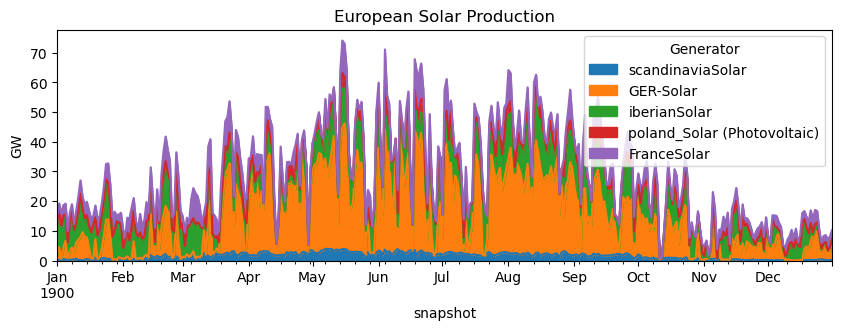

In [21]:
# Afficher production solaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Solar"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Solar Production",
)

<Axes: title={'center': 'European Hydro Production'}, xlabel='snapshot', ylabel='GW'>

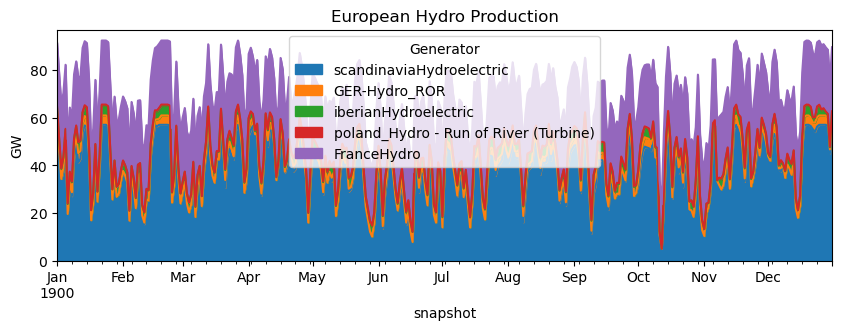

In [22]:
# Afficher production hydro européenne
network.generators_t.p.loc[:, network.generators.carrier == "Hydro"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Hydro Production",
)

<Axes: title={'center': 'European Wind Production'}, xlabel='snapshot', ylabel='GW'>

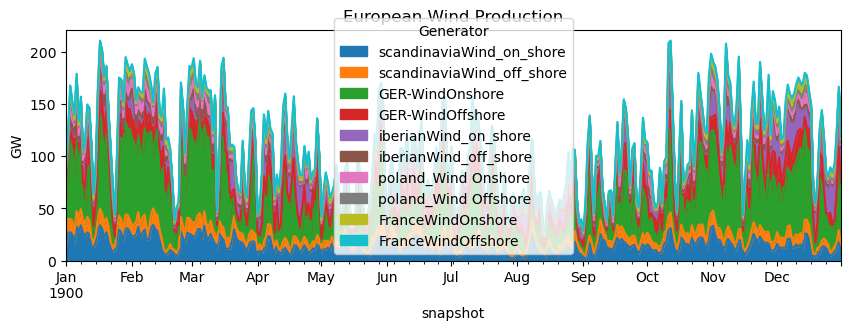

In [23]:
# Afficher production éolienne européenne
list_wind = ["Wind_off_shore", "Wind_on_shore", "Wind"]
network.generators_t.p.loc[:, network.generators.carrier.isin(list_wind)].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Wind Production",
)

<Axes: title={'center': 'European Nuclear Production'}, xlabel='snapshot', ylabel='GW'>

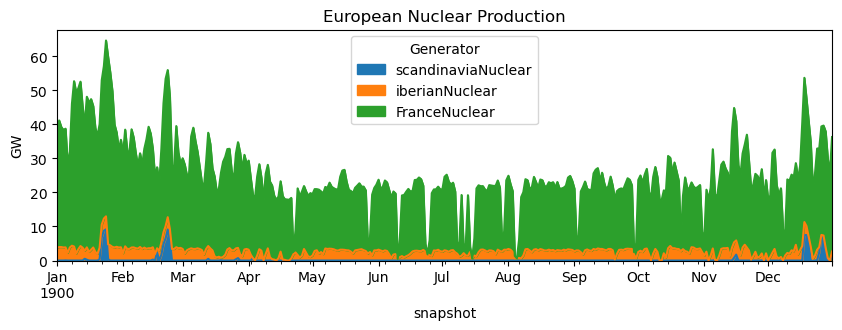

In [24]:
# Afficher production nucléaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Nuclear"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Nuclear Production",
)

<Axes: title={'center': 'European Thermal Production'}, xlabel='snapshot', ylabel='GW'>

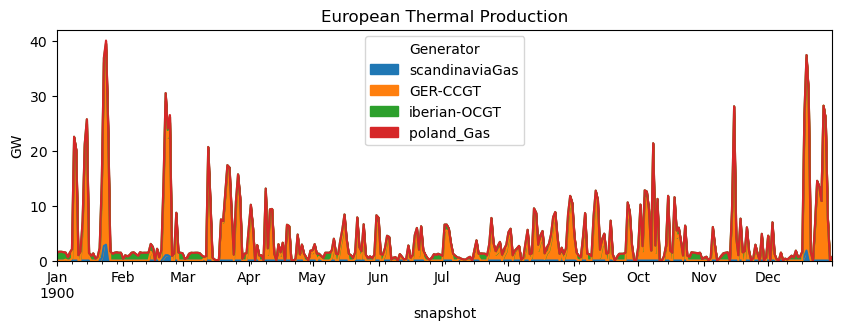

In [25]:
# Afficher production thermique européenne
network.generators_t.p.loc[:, network.generators.carrier == "Gas"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Thermal Production",
)

<Axes: title={'center': 'European Coal Production'}, xlabel='snapshot', ylabel='GW'>

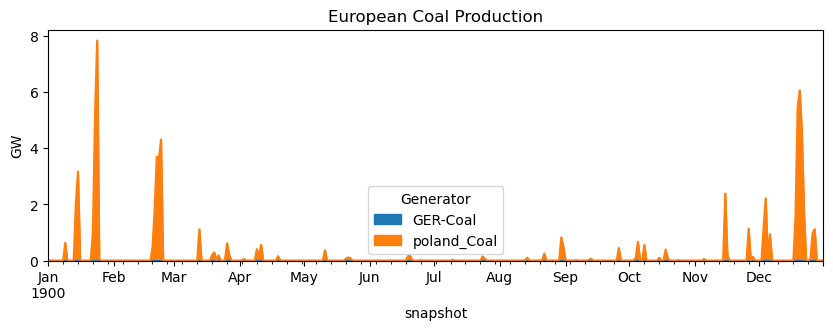

In [26]:
# Afficher production charbon europe
network.generators_t.p.loc[:, network.generators.carrier == "Coal"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Coal Production",
)

<Axes: title={'center': 'European Failure Production remaining'}, xlabel='snapshot', ylabel='GW'>

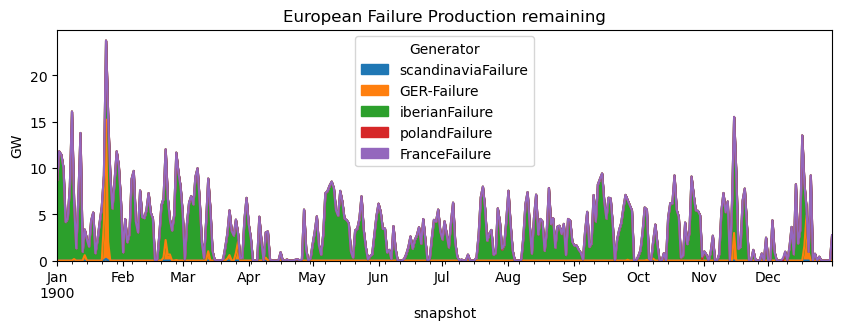

In [27]:
# Afficher remaining failure europe
network.generators_t.p.loc[:, network.generators.carrier == "Failure"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Failure Production remaining",
)

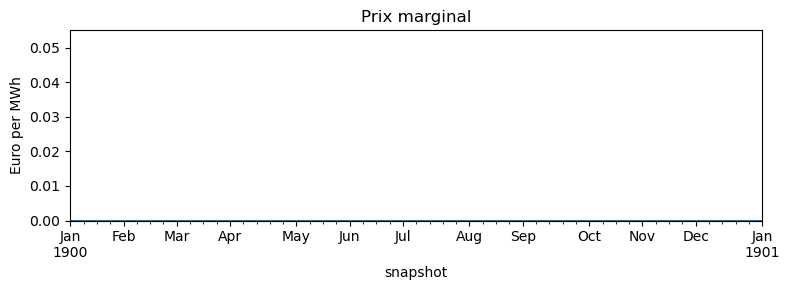

In [28]:
network.buses_t.marginal_price.mean(1).resample('1W').mean().clip(0,20).plot.area(figsize=(8, 3), ylabel="Euro per MWh", title="Prix marginal")
plt.tight_layout()

In [29]:
network.generators

attribute                                            bus control type  \
Generator                                                               
scandinaviaGas                               Scandinavia      PQ        
scandinaviaBioEnergies                       Scandinavia      PQ        
scandinaviaHydroelectric                     Scandinavia      PQ        
scandinaviaWind_on_shore                     Scandinavia      PQ        
scandinaviaWind_off_shore                    Scandinavia      PQ        
scandinaviaNuclear                           Scandinavia      PQ        
scandinaviaSolar                             Scandinavia      PQ        
scandinaviaFailure                           Scandinavia      PQ        
GER-Hydro_ROR                                    Germany      PQ        
GER-WindOnshore                                  Germany      PQ        
GER-WindOffshore                                 Germany      PQ        
GER-Solar                                        Germany      PQ        
GER-Coal                                         Germany      PQ        
GER-Biomass                                      Germany      PQ        
GER-CCGT                                         Germany      PQ        
GER-Oil                                          Germany      PQ        
GER-Failure                                      Germany      PQ        
iberian-OCGT                           Iberian_Peninsula      PQ        
iberianBioEnergies                     Iberian_Peninsula      PQ        
iberianHydroelectric                   Iberian_Peninsula      PQ        
iberianWind_on_shore                   Iberian_Peninsula      PQ        
iberianWind_off_shore                  Iberian_Peninsula      PQ        
iberianNuclear                         Iberian_Peninsula      PQ        
iberianSolar                           Iberian_Peninsula      PQ        
iberianFailure                         Iberian_Peninsula      PQ        
poland_Lignite                                    poland      PQ        
poland_Coal                                       poland      PQ        
poland_Gas                                        poland      PQ        
poland_Others non-renewable                       poland      PQ        
poland_Hydro - Run of River (Turbine)             poland      PQ        
poland_Wind Onshore                               poland      PQ        
poland_Wind Offshore                              poland      PQ        
poland_Solar (Photovoltaic)                       poland      PQ        
poland_Biofuel                                    poland      PQ        
poland_Others renewable                           poland      PQ        
polandFailure                                     poland      PQ        
FranceNuclear                                     France      PQ        
FranceWindOnshore                                 France      PQ        
FranceWindOffshore                                France      PQ        
FranceSolar                                       France      PQ        
FranceOCGT                                        France      PQ        
FranceBioEnergies                                 France      PQ        
FranceHydro                                       France      PQ        
FranceFailure                                     France      PQ        

attribute                                  p_nom  p_nom_extendable  p_nom_min  \
Generator                                                                       
scandinaviaGas                            5000.0             False        0.0   
scandinaviaBioEnergies                   11000.0             False        0.0   
scandinaviaHydroelectric                 57000.0             False        0.0   
scandinaviaWind_on_shore                 43000.0             False        0.0   
scandinaviaWind_off_shore                17000.0             False        0.0   
scandinaviaNuclear                       11000.0             False        

In [30]:
#comparaison avec 2022 ? 
#why failure in Germany doesn't appear ?
#Creating one failure for all EUrope ? 

<Axes: xlabel='snapshot', ylabel='MW'>

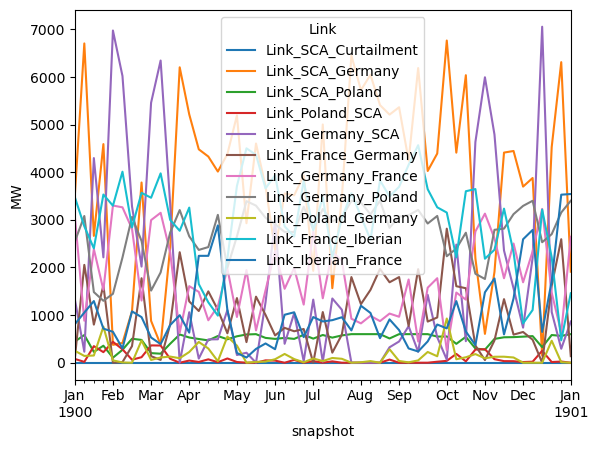

In [31]:
network.links_t.p0.resample("W").mean().plot.line(subplots=False, ylabel="MW", stacked=False)

<Axes: xlabel='snapshot', ylabel='MW'>

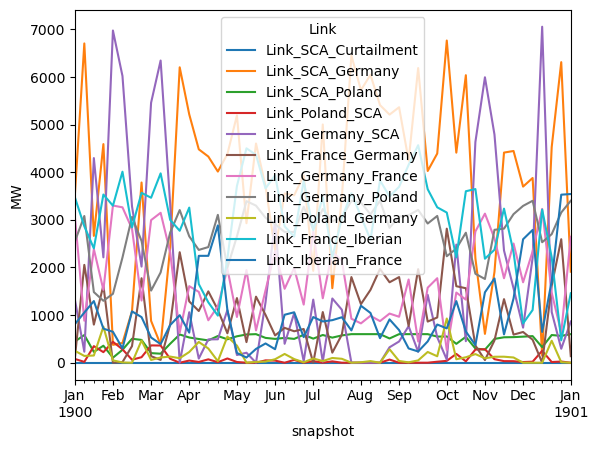

In [32]:
#Exchanges between France and Iberian Peninsula

network.links_t.p0.resample("W").mean().plot.line(subplots=False, ylabel="MW", stacked=False)



In [33]:
# Filter links for exchanges between France and Spain
filtered_links = network.links[(network.links.bus0 == "Iberian_Peninsula") & (network.links.bus1 == "France")]

# Plot the exchanges
#filtered_links_t = filtered_links_t.p0.resample("W").mean()
#filtered_links_t.plot.line(subplots=False, ylabel="MW", stacked=False)

In [34]:
network.links_t.p0.resample("W").mean()

Link        Link_SCA_Curtailment  Link_SCA_Germany  Link_SCA_Poland  \
snapshot                                                              
1900-01-07         -3.637302e-15       3492.326842       444.765727   
1900-01-14          0.000000e+00       6703.569008       581.144048   
1900-01-21          3.197442e-14       2663.063415       227.389382   
1900-01-28         -2.300805e-14       4589.889525       357.070845   
1900-02-04         -5.109141e-14        375.117112       105.744677   
1900-02-11         -3.586549e-14        415.688333       270.485276   
1900-02-18          1.700227e-14       1080.847978       503.333343   
1900-02-25         -2.588406e-14       3783.892914       478.571429   
1900-03-04          2.909842e-14        878.714947       201.614850   
1900-03-11         -5.549000e-14        377.658904       189.334273   
1900-03-18          6.699403e-14       2414.562826       398.107372   
1900-03-25         -1.962451e-14       6202.162145       592.857143   
1900-04-01         -1.387250e-14       5213.770673       529.592293   
1900-04-08         -1.104725e-13       4480.315199       498.056479   
1900-04-15         -6.073449e-14       4328.842464       468.521805   
1900-04-22         -3.891067e-15       4013.403244       560.617270   
1900-04-29          7.469158e-14       4380.632725       492.184831   
1900-05-06         -4.759156e-14       5192.540314       554.999937   
1900-05-13          7.748299e-14       2928.976054       592.913169   
1900-05-20         -1.624098e-14       4601.737452       600.000000   
1900-05-27         -2.163349e-14       3700.849520       521.164787   
1900-06-03         -1.309006e-14       2354.240313       500.468609   
1900-06-10          1.416856e-15       3553.062978       521.313847   
1900-06-17          1.772127e-14       3515.777635       500.280847   
1900-06-24         -5.969828e-14       3932.299910       585.861341   
1900-07-01         -4.073990e-14       1929.294650       505.898246   
1900-07-08          1.759439e-14       5001.824124       582.142857   
1900-07-15          4.652363e-14       1564.898512       526.997807   
1900-07-22          3.112854e-14       3467.797420       573.346178   
1900-07-29          3.248195e-14       6449.231870       600.000000   
1900-08-05         -4.466269e-14       5723.202207       600.000000   
1900-08-12         -2.706829e-14       6044.893642       600.000000   
1900-08-19         -3.045183e-14       5408.678797       600.000000   
1900-08-26          1.251909e-14       5209.664399       509.249185   
1900-09-02          1.015061e-14       5363.494254       600.000000   
1900-09-09          2.030122e-14       4244.397848       600.000000   
1900-09-16          4.060244e-15       6186.418377       600.000000   
1900-09-23          8.120488e-15       4025.611178       600.000000   
1900-09-30          6.344132e-14       4392.216867       548.479682   
1900-10-07         -6.564061e-14       6764.418319       551.093922   
1900-10-14          3.451208e-14       4410.800361       396.428571   
1900-10-21         -8.831031e-14       6036.517190       543.811466   
1900-10-28         -3.112854e-14       2191.935780       299.575815   
1900-11-04          3.112854e-14        605.786787       274.277381   
1900-11-11         -3.062101e-14       1906.572315       500.000000   
1900-11-18          2.300805e-14       4411.844528       534.089975   
1900-11-25         -2.774500e-14       4445.315650       537.286278   
1900-12-02         -5.413659e-14       3697.699980       547.272243   
1900-12-09         -1.353415e-14       3878.563936       558.825376   
1900-12-16          2.030122e-14        147.703935       327.299624   
1900-12-23          4.297092e-14       4527.662750       581.220595   
1900-12-30         -6.141119e-14       6310.387110       564.285714   
1901-01-06         -1.894781e-14       1910.791206       600.000000   

Link        Link_Poland_SCA  Link_Germany_SCA  Link_France_Germany  \
snapshot                

In [35]:
network.storage_units_t.p.columns

Index(['GER-PumpedHydroOL', 'GER-PumpedHydroCL', 'Battery',
       'poland_Hydro - Reservoir (Turbine)',
       'poland_Hydro - Pump Storage Open Loop (Turbine)',
       'poland_Hydro - Pump Storage Closed Loop (Turbine)'],
      dtype='object', name='StorageUnit')

In [49]:
# Specify the country you are interested in
target_country = "France"

# Filter links for the specified country
filtered_links = network.links[(network.links.bus0 == target_country) | (network.links.bus1 == target_country)]

# Aggregate and plot the values
filtered_links_resampled = filtered_links.p0.resample("W").mean()
filtered_links_resampled.plot.line(subplots=False, ylabel="MW", stacked=False)

SyntaxError: invalid syntax (3031619914.py, line 5)

In [53]:
filtered_links

attribute                         bus0               bus1 type carrier  \
Link                                                                     
Link_France_Germany             France            Germany           AC   
Link_Germany_France            Germany             France           AC   
Link_France_Iberian             France  Iberian_Peninsula           AC   
Link_Iberian_France  Iberian_Peninsula             France           AC   

attribute            efficiency  build_year  lifetime   p_nom  \
Link                                                            
Link_France_Germany        0.95           0       inf  3300.0   
Link_Germany_France        0.95           0       inf  3300.0   
Link_France_Iberian        0.95           0       inf  5000.0   
Link_Iberian_France        0.95           0       inf  5000.0   

attribute            p_nom_extendable  p_nom_min  ...  shut_down_cost  \
Link                                              ...                   
Link_France_Germany             False        0.0  ...             0.0   
Link_Germany_France             False        0.0  ...             0.0   
Link_France_Iberian             False        0.0  ...             0.0   
Link_Iberian_France             False        0.0  ...             0.0   

attribute            min_up_time  min_down_time  up_time_before  \
Link                                                              
Link_France_Germany            0              0               1   
Link_Germany_France            0              0               1   
Link_France_Iberian            0              0               1   
Link_Iberian_France            0              0               1   

attribute            down_time_before  ramp_limit_up  ramp_limit_down  \
Link                                                                    
Link_France_Germany                 0            NaN              NaN   
Link_Germany_France                 0            NaN              NaN   
Link_France_Iberian                 0            NaN              NaN   
Link_Iberian_France                 0            NaN              NaN   

attribute            ramp_limit_start_up  ramp_limit_shut_down  p_nom_opt  
Link                                                                       
Link_France_Germany                  1.0                   1.0     3300.0  
Link_Germany_France                  1.0                   1.0     3300.0  
Link_France_Iberian                  1.0                   1.0     5000.0  
Link_Iberian_France                  1.0                   1.0     5000.0  

[4 rows x 32 columns]

In [51]:
network.links

attribute                          bus0               bus1 type carrier  \
Link                                                                      
Link_SCA_Curtailment        Scandinavia        Curtailment           AC   
Link_SCA_Germany            Scandinavia            Germany           AC   
Link_SCA_Poland             Scandinavia             poland           AC   
Link_Poland_SCA                  poland        Scandinavia           AC   
Link_Germany_SCA                Germany        Scandinavia           AC   
Link_France_Germany              France            Germany           AC   
Link_Germany_France             Germany             France           AC   
Link_Germany_Poland             Germany             poland           AC   
Link_Poland_Germany              poland            Germany           AC   
Link_France_Iberian              France  Iberian_Peninsula           AC   
Link_Iberian_France   Iberian_Peninsula             France           AC   

attribute             efficiency  build_year  lifetime     p_nom  \
Link                                                               
Link_SCA_Curtailment        0.95           0       inf  700000.0   
Link_SCA_Germany            0.95           0       inf    7415.0   
Link_SCA_Poland             0.95           0       inf     600.0   
Link_Poland_SCA             0.95           0       inf     600.0   
Link_Germany_SCA            0.95           0       inf    7415.0   
Link_France_Germany         0.95           0       inf    3300.0   
Link_Germany_France         0.95           0       inf    3300.0   
Link_Germany_Poland         0.95           0       inf    3400.0   
Link_Poland_Germany         0.95           0       inf    3400.0   
Link_France_Iberian         0.95           0       inf    5000.0   
Link_Iberian_France         0.95           0       inf    5000.0   

attribute             p_nom_extendable  p_nom_min  ...  shut_down_cost  \
Link                                               ...                   
Link_SCA_Curtailment             False        0.0  ...             0.0   
Link_SCA_Germany                 False        0.0  ...             0.0   
Link_SCA_Poland                  False        0.0  ...             0.0   
Link_Poland_SCA                  False        0.0  ...             0.0   
Link_Germany_SCA                 False        0.0  ...             0.0   
Link_France_Germany              False        0.0  ...             0.0   
Link_Germany_France              False        0.0  ...             0.0   
Link_Germany_Poland              False        0.0  ...             0.0   
Link_Poland_Germany              False        0.0  ...             0.0   
Link_France_Iberian              False        0.0  ...             0.0   
Link_Iberian_France              False        0.0  ...             0.0   

attribute             min_up_time  min_down_time  up_time_before  \
Link                                                               
Link_SCA_Curtailment            0              0               1   
Link_SCA_Germany                0              0               1   
Link_SCA_Poland                 0              0               1   
Link_Poland_SCA                 0              0               1   
Link_Germany_SCA                0              0               1   
Link_France_Germany             0              0               1   
Link_Germany_France             0              0               1   
Link_Germany_Poland             0              0               1   
Link_Poland_Germany             0              0               1   
Link_France_Iberian             0              0               1   
Link_Iberian_France             0              0               1   

attribute             down_time_before  ramp_limit_up  ramp_limit_down  \
Link                                                                     
Link_SCA_Curtailment                 0            NaN              NaN   
Link_SCA_Germany                     0            NaN              Na